From the tutorial: [Julia DifferentialEquations.jl to model an explosion load](https://nikstoyanov.me/post/2019-02-22-single-degree-of-freedom-oscillator/)

In [1]:
import Pkg
Pkg.add(["Plots", "DiffEqCallbacks", "DifferentialEquations", "ParameterizedFunctions"])

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [2]:
using Plots
using DiffEqCallbacks
using DifferentialEquations
using ParameterizedFunctions

In [3]:
g = @ode_def begin
    dx = v
    dv = (-c * v - k * x - p) / m
end c k p m

(::var"##253"{var"###ParameterizedDiffEqFunction#273",var"###ParameterizedTGradFunction#274",var"###ParameterizedJacobianFunction#275",Nothing,Nothing,ModelingToolkit.ODESystem}) (generic function with 1 method)

In [4]:
tspan = (0.0, 100.0)
x0 = [0.; 1.0]
p = [0.1, 10.0, 1.0, 1.0];

In [5]:
function condition(x, t, integrator)
    true
end

function affect!(integrator)
    if integrator.t > 60
        integrator.p[3] = 10.
    else
        integrator.p[3] = 1.
    end
end

cb = DiscreteCallback(condition, affect!);

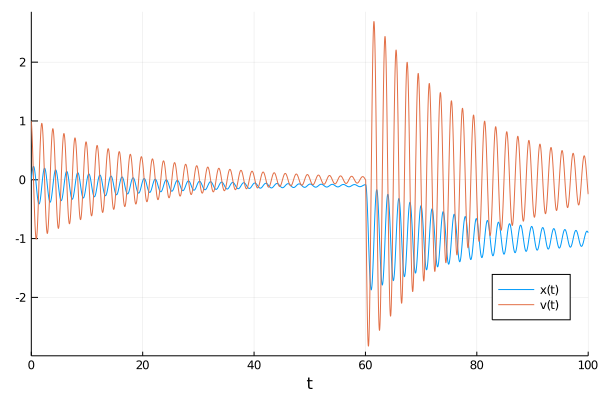

In [6]:
prob = ODEProblem(g, x0, tspan, p)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8, callback = cb)
plot(sol, legend=:bottomright, format=:svg)